# INGEST

In [1]:
import numpy as np
import random
import pandas as pd
import time
import string
import copy
import matplotlib.pyplot as plt

# GENERATE DATA

In [2]:
# Set random seed. 
np.random.seed(12345)

# Generate a list with random string characters.
# Each element in the list is 10 characters long. 
# Total length of the list is 100,000. 
names_unsort = [''.join(random.choices(string.ascii_letters, k=10)) for _ in range(100000)]

# Create a new set from the generated list. 
names_set = set(names_unsort)

In [3]:
# Quick sort recursive algorithm. 
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        less = [i for i in array[1:] if i <= pivot]
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

In [4]:
# Record runtime to sort the list with Quicksort.
start_time = time.perf_counter()
names_sort = quicksort(copy.copy(names_unsort))
end_time = time.perf_counter()
sort_time = (end_time-start_time)*1000

In [5]:
# Pick the names based on their locations. Note that 9999 returns the 10,000th location since Python starts with 0. 
pick_index=[9999, 29999, 49999, 69999, 89999, 99999]
pick_names=[]
for i in pick_index:
    pick_names.append(names_unsort[i])

# DEFINE FUNCTIONS

In [6]:
# Define a linear search algorithm. 
def linear_search(myarray, item):
    i = 0
    while i < len(myarray):
        if myarray[i] == item:
            return myarray[i]
        i += 1
    return None

In [7]:
# Define a binary search algorithm. 
def binary_search(myarray, item):
    low_idx = 0
    high_idx = len(myarray) - 1
    
    while low_idx <= high_idx:
        mid_idx = (low_idx + high_idx) // 2
        guess = myarray[mid_idx]
        
        if guess == item:
            return myarray[mid_idx]
        elif guess > item:
            high_idx = mid_idx - 1
        else: 
            low_idx = mid_idx + 1   
    return None

In [8]:
# Define a in search algorithm. 
def in_search(myset, target_list):
    target = []
    for i in target_list:
        if i in myset:
            target.append(i)
    return target

In [9]:
# Define a function to record the runtimes. 
def runtime_call(def_function, array, target):
    call_time =[]
    for elements in target:
        start_time = time.perf_counter()
        running = def_function(array, elements)
        end_time = time.perf_counter()
        time_list = (end_time-start_time)*1000 
        call_time.append(time_list)
    return call_time

In [10]:
linear_time = runtime_call(linear_search,names_unsort, pick_names)
binary_time = runtime_call(binary_search,names_sort, pick_names)
in_time = runtime_call(in_search,names_set, pick_names)

In [11]:
binary_and_sort_time = []
for i in range(len(binary_time)):
    binary_and_sort_time.append(sort_time + binary_time[i])

# TABLE AND GRAPH

In [12]:
position =[10000,30000,50000,70000,90000,100000]
data = np.array([position,linear_time,binary_time,in_time,binary_and_sort_time]).T
df = pd.DataFrame(data)
df.columns = ['Name Position', 'Linear Search Time (ms)', 'Binary Search Time (ms)','In Search Time (ms)','Binary+Sort Time (ms)']
display(df)

,Name Position,Linear Search Time (ms),Binary Search Time (ms),In Search Time (ms),Binary+Sort Time (ms)
0,10000.0,5.6107,0.0088,0.0028,270.5238
1,30000.0,8.4762,0.0058,0.0016,270.5208
2,50000.0,9.6322,0.0056,0.0014,270.5206
3,70000.0,9.3768,0.0052,0.0011,270.5202
4,90000.0,12.3175,0.0058,0.0010,270.5208
5,100000.0,13.7593,0.0049,0.0008,270.5199


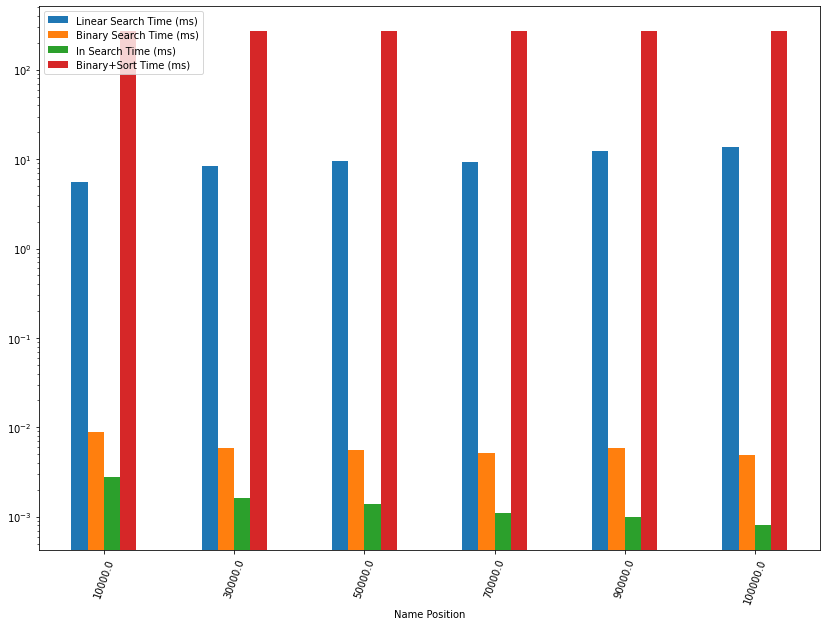

In [13]:
df.set_index('Name Position')[['Linear Search Time (ms)', 'Binary Search Time (ms)', 'In Search Time (ms)','Binary+Sort Time (ms)']].plot(kind='bar',figsize=(14,10))
plt.xticks(rotation=70)
plt.yscale("log")

# CONCLUSION

There are 3 types of searching algorithms used in this practice: linear search, binary search and a Python builtin research tool for set (we will call it "in search" for the rest of this conclusion section). The logics behind each searching algorithm is as per below:

- Linear Search: Search through the whole list one by one for the target item. List can be sorted or unsorted. 
- Binary Search: Only applicable on sorted list. Find the middle item and split the list into 3 parts: less than mid, mid and greater than mid. Compare the target item with mid-item, if it is the one, then take it and complete. Otherwise if target item is greater than mid-item, take the splitted list of "greater than mid", or take the splitted list of "less than mid" if target item is lesser than mid-item. Repeat these steps until the mid-item is equal to the target item. 
- In Search: Instant output the target item from the set.

The big O notations and explainations for each searching algorithm is shown as per below:

- Linear Search: Worest case scenario is O(n) for n numbers in the list. 
- Binary Search: Worest case scenario is O(log(n)) for n numbers in the list. 
- In Search: Worest case scenario is O(n) for n numbers in the list, while its average case if O(1). In order to avoid the worest-case performance, we need to avoid collisions in hash tables. 

Based on our practice results, we've validated that in search holds the fastest runtimes out of the 3 algorithms, with a big O notation of O(1). Binary search ranks second, with a big O notation of O(log(n)). However, since binary search is only applicable on sorted lists, we would need to consider sorting time as well. Even after using the fastest sorting algorithm  quicksort, we end up with runtimes (sort time + binary search time) the largest among all. Hence, it seems like binary search is not very sufficient on unsorted lists. Linear search is not a good option becasue it can be very slow as per its big O notation of O(n). In conclusion, I recommend to use in search method to find the target items, but remember the fact that in search is only applicable to specific data structures, such as sets, dictionaries, etc. 